# Linerar programming optimization

Follwoing [realpython](https://realpython.com/linear-programming-python/)

Linear programming is a set of techniques used in mathematical programming, sometimes called mathematical optimization, to solve systems of linear equations and inequalities while maximizing or minimizing some linear function.

**Mixed-integer linear programming** is an extension of linear programming. It handles problems in which at least one variable takes a discrete integer rather than a continuous value. Although mixed-integer problems look similar to continuous variable problems at first sight, they offer significant advantages in terms of flexibility and precision.

Mixed-integer linear programming allows you to overcome many of the limitations of linear programming. You can approximate non-linear functions with piecewise linear functions, use semi-continuous variables, model logical constraints, and more. 

## Small linear programming problem

Consider the following linear programming problem:

maximise
\begin{equation}
z = x + 2y
\end{equation}
subject to
\begin{eqnarray}
2x + y &\leq& 20 \\
-4x + 5y &\leq& 10 \\
-x +2y &\geq& -2 \\
x &\geq& 0 \\
y &\geq& 0
\end{eqnarray}

The independent variables you need to find—in this case x and y—are called the **decision variables**. The function of the decision variables to be maximized or minimized—in this case z—is called the **objective function**, the **cost function**, or just the **goal**. The inequalities you need to satisfy are called the **inequality constraints**. You can also have equations among the constraints called **equality constraints**.

In [1]:
import numpy as np

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use("dark_background")

In [3]:
x = y = np.linspace(0,10, 1000)
xx, yy = np.meshgrid(x,y)

In [4]:
constraint_1 = 2 * xx + yy <= 20
constraint_2 = -4 * xx + 5 * yy <= 10
constraint_3 = -1 * xx + 2 * yy >= -2

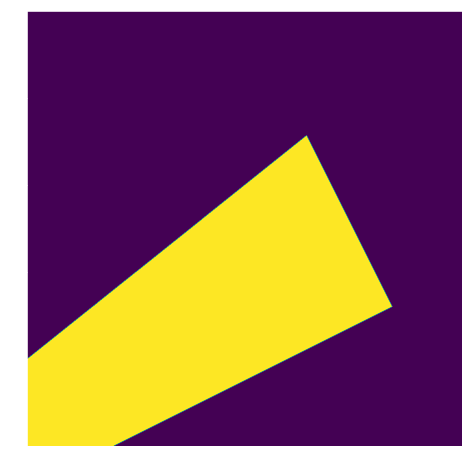

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
feasible_region = ax.imshow(constraint_1*constraint_2*constraint_3, origin='lower', aspect='equal', extent=[0, 10, 0, 10])

Each point of the yellow area satisfies all constraints and is a potential solution to the problem. This area is called the **feasible region**, and its points are **feasible solutions**. In this case, there’s an infinite number of feasible solutions.

You want to maximize z. The feasible solution that corresponds to maximal z is the optimal solution. If you were trying to minimize the objective function instead, then the optimal solution would correspond to its feasible minimum.

Note that z is linear. You can imagine it as a plane in three-dimensional space. This is why the optimal solution must be on a **vertex**, or corner, of the feasible region.

Sometimes a whole edge of the feasible region, or even the entire region, can correspond to the same value of z. In that case, you have many optimal solutions.

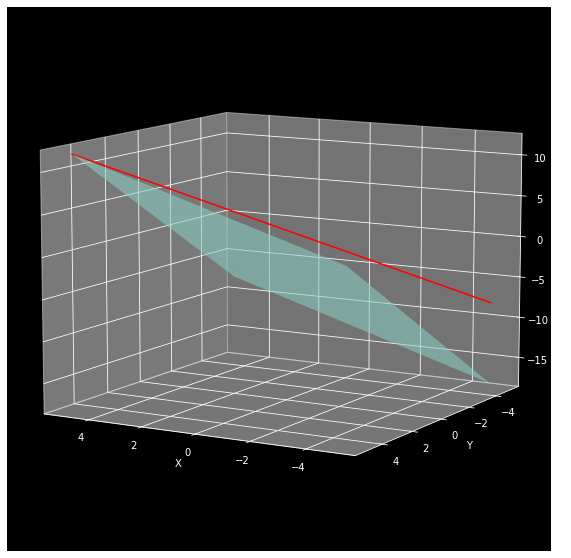

In [84]:
# 3d plot, just for presentations

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

a, b, c= 1, 2, -3

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

Z = a*X + b*Y + c

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, alpha=0.65)
ax.plot(x, y, x+y+2, color="red")


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(elev=10, azim=120)
plt.show()

fig.savefig(f"../imgs/optimisation_plane.png", transparent=True)

Add an equality constrain
\begin{equation}
-x + 5y = 15
\end{equation}

In [7]:
constraint_4 = (-1 * xx + 5 * yy <= 15+0.1) & (-1 * xx + 5 * yy >= 15-0.1)

In [8]:
# fig, ax = plt.subplots(figsize=(8,8))

# feasible_region = ax.imshow(constraint_1*constraint_2*constraint_3*constraint_4, 
#                             origin='lower', aspect='equal', extent=[0, 10, 0, 10])


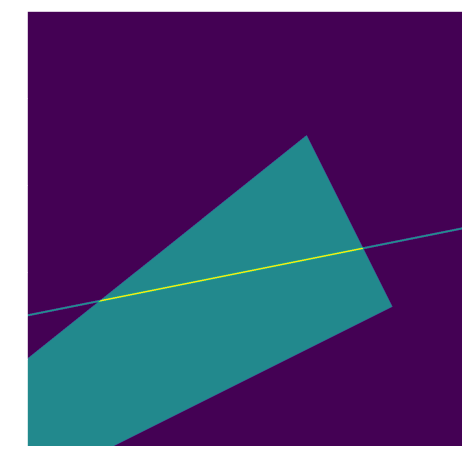

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

feasible_region = ax.imshow(constraint_1*constraint_2*constraint_3+constraint_4*1.1, 
                            origin='lower', aspect='equal', extent=[0, 10, 0, 10])


The feasible region is now a line, if we demand that all values of x must be integer we will get a **mixed integer linear programming problem**. The set of feasible solutions will change to points aranged on a line.

A linear integer programming problem is **feasible** when it has bounded feasible regions and finite solutions.

A linear programming problem is infeasible if it does not have a solution. This usually happens when no solution can satisfy all constraints at once.

A linear programming problem is unbounded if its feasible region isn’t bounded and the solution is not finite. This means that at least one of your variables is not constrained and can reach to positive or negative infinity, making the objective infinite as well.

## Ressource allocation problem

Say that a factory produces four different products, and that the daily produced amount of the first product is $x_1$, the amount produced of the second product is $x_2$, and so on. The goal is to determine the profit-maximizing daily production amount for each product, bearing in mind the following conditions:

1. The profit per unit of product is 20\\$, 12\\$, 40\\$, and 25\\$ for the first, second, third, and fourth product, respectively.
2. Due to manpower constraints, the total number of units produced per day can’t exceed fifty.
3. For each unit of the first product, three units of the raw material $A$ are consumed. Each unit of the second product requires two units of the raw material $A$ and one unit of the raw material $B$. Each unit of the third product needs one unit of $A$ and two units of $B$. Finally, each unit of the fourth product requires three units of $B$.
4. Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material $A$ and ninety units of $B$ per day.

The mathematical model can be defined as such:

\begin{equation}
\mathrm{max} \left(20x_1+12x_2+40x_3+25x_4 \right) 
\end{equation}
s.t.:
\begin{eqnarray}
&x_1& + &x_2& + &x_3& + &x_4& &\leq& 50 \, &(\mathrm{manpower})& \\
3&x_1&+2&x_2&+&x_3& && &\leq& 100 \, &(\mathrm{material} \ A)& \\
&& &x_2&+2&x_3&+3&x_4& &\leq& 90 \, &(\mathrm{material} \ B)& \\
\end{eqnarray}
\begin{eqnarray}
x_1, x_2, x_3, x_4 \geq 0
\end{eqnarray}


## Python implementation

### scipy toy example

In [10]:
from scipy.optimize import linprog

Solve the above toy example:

maximise
\begin{equation}
z = x + 2y
\end{equation}
subject to
\begin{eqnarray}
2x + y &\leq& 20 \\
-4x + 5y &\leq& 10 \\
-x +2y &\geq& -2 \\
x &\geq& 0 \\
y &\geq& 0
\end{eqnarray}

`linprog()` solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥). To work around these issues, you need to modify your problem before starting optimization:

\begin{equation}
\mathrm{min} (-z = -x - 2y)
\end{equation}
subject to
\begin{eqnarray}
2x + y &\leq& 20 \\
-4x + 5y &\leq& 10 \\
x - 2y &\leq& 2 \\
x &\geq& 0 \\
y &\geq& 0
\end{eqnarray}

In [11]:
obj = [-1, -2]  # holds the coefficients from the objective function.
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

# left-hand-side of inqeualities
lhs_ineq = [[ 2,  1],  
            [-4,  5],  
            [ 1, -2]]

# right-hand-side of inequalities
rhs_ineq = [20,  
            10, 
            2] 

# equality
lhs_eq = [[-1, 5]]
rhs_eq = [15]

# bounds
bnd = [(0, float("inf")),  # Bounds of x
        (0, float("inf"))]  # Bounds of y

In [12]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
              method='highs')

In [13]:
opt

           con: array([0.])
 crossover_nit: 0
         eqlin:  marginals: array([-0.27272727])
  residual: array([0.])
           fun: -16.818181818181817
       ineqlin:  marginals: array([-0.63636364, -0.        , -0.        ])
  residual: array([ 0.        , 18.18181818,  3.36363636])
         lower:  marginals: array([0., 0.])
  residual: array([7.72727273, 4.54545455])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 0
         slack: array([ 0.        , 18.18181818,  3.36363636])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([7.72727273, 4.54545455])

In [14]:
opt.success

True

In [15]:
opt.x

array([7.72727273, 4.54545455])

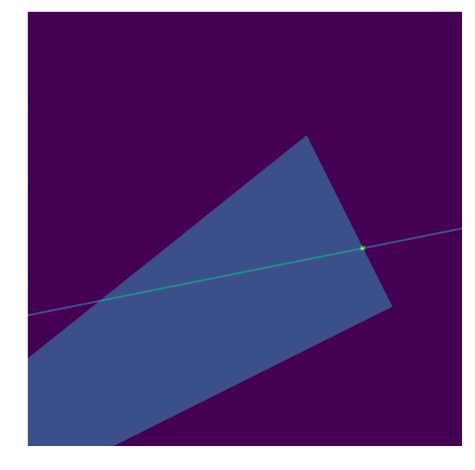

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

sol = (np.abs(xx-opt.x[0])<0.05) & (np.abs(yy-opt.x[1])<0.05)
feasible_region = ax.imshow(constraint_1*constraint_2*constraint_3+constraint_4*1.1+sol*2, 
                            origin='lower', aspect='equal', extent=[0, 10, 0, 10])


 ### scipy ressource allocation

\begin{equation}
\mathrm{max} \left(20x_1+12x_2+40x_3+25x_4 \right) 
\end{equation}
s.t.:
\begin{eqnarray}
&x_1& + &x_2& + &x_3& + &x_4& &\leq& 50 \, &(\mathrm{manpower})& \\
3&x_1&+2&x_2&+&x_3& && &\leq& 100 \, &(\mathrm{material} \ A)& \\
&& &x_2&+2&x_3&+3&x_4& &\leq& 90 \, &(\mathrm{material} \ B)& \\
\end{eqnarray}
\begin{eqnarray}
x_1, x_2, x_3, x_4 \geq 0
\end{eqnarray}


In [17]:
obj = [-20, -12, -40, -25]

lhs_ineq = [[1, 1, 1, 1],  # Manpower
            [3, 2, 1, 0],  # Material A
            [0, 1, 2, 3]]  # Material B

rhs_ineq = [ 50,  # Manpower
            100,  # Material A
             90]  # Material B

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              method="highs")
opt

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -1900.0
       ineqlin:  marginals: array([-20.,  -0., -10.])
  residual: array([ 0., 40.,  0.])
         lower:  marginals: array([ 0., 18.,  0., 25.])
  residual: array([ 5.,  0., 45.,  0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 4
         slack: array([ 0., 40.,  0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf])
             x: array([ 5.,  0., 45.,  0.])

The result tells us that the maximal profit is 1900 and corresponds to $x_1$ = 5 and $x_3$ = 45. It is not profitable to produce the second and fourth products under the given conditions. You can draw several interesting conclusions here:

1. The third product brings the largest profit per unit, so the factory will produce it the most.
2. The first slack is 0, which means that the values of the left and right sides of the manpower (first) constraint are the same. The factory produces 50 units per day, and that is its full capacity.
3. The second slack is 40 because the factory consumes 60 units of raw material A (15 units for the first product plus 45 for the third) out of a potential 100 units.
4. The third slack is 0, which means that the factory consumes all 90 units of the raw material B. This entire amount is consumed for the third product. That’s why the factory cannot produce the second or fourth product at all and can’t produce more than 45 units of the third product. It lacks the raw material B.